# Trabajo 2 Individual

### Mario Rozas.

Primero, instalamos e importamos todo lo necesario.

In [1]:
!pip install pydataset 
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import datasets
import copy

## Dataset a ser utilizado: (corresponde a la base de datos de un banco)
Lo cargamos y le damos un vistazo. Los datos corresponden a los registros de los clientes del banco.

In [2]:
bank_data = pd.read_csv("BankData.csv")
display(bank_data.head(10))

#Solo variables numericas
a = bank_data[['Customer_Age', 'Dependent_count', 'Months_on_book',	'Total_Relationship_Count',	'Months_Inactive_12_mon',	'Credit_Limit',	'Total_Revolving_Bal',	'Total_Trans_Amt',	'Total_Trans_Ct']]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,4010.0,1247,1088,24
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,34516.0,2264,1330,31
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,29081.0,1396,1538,36
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,22352.0,2517,1350,24
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,11656.0,1677,1441,32


In [3]:
display(a.head(10))

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,45,3,39,5,1,12691.0,777,1144,42
1,49,5,44,6,1,8256.0,864,1291,33
2,51,3,36,4,1,3418.0,0,1887,20
3,40,4,34,3,4,3313.0,2517,1171,20
4,40,3,21,5,1,4716.0,0,816,28
5,44,2,36,3,1,4010.0,1247,1088,24
6,51,4,46,6,1,34516.0,2264,1330,31
7,32,0,27,2,2,29081.0,1396,1538,36
8,37,3,36,5,2,22352.0,2517,1350,24
9,48,2,36,6,3,11656.0,1677,1441,32


## Procesamiento de datos (Hecho de manera grupal)

### Variables escogidas para trabajar:

Total_Trans_Amt, Total_Trans_Ct, Total_Relationshio_Count, Credit_Limit, Total_Revolving_Bal, Months on Book y Months Inactive, el resto no se usarán debido a que se determinó anteriormente como grupo que no tenian valor para el modelo. A esto hay que sumarle Attrition_Flag.

In [4]:
bank_data = ((((((((bank_data.drop("Customer_Age", axis =1)).drop("Card_Category", axis =1).drop("Education_Level", axis =1)).drop("Dependent_count", axis =1).drop("Income_Category", axis =1)))).drop("Gender", axis =1)).drop("Marital_Status", axis =1)).drop("CLIENTNUM", axis = 1))
bank_data

,Attrition_Flag,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,39,5,1,12691.0,777,1144,42
1,Existing Customer,44,6,1,8256.0,864,1291,33
2,Existing Customer,36,4,1,3418.0,0,1887,20
3,Existing Customer,34,3,4,3313.0,2517,1171,20
4,Existing Customer,21,5,1,4716.0,0,816,28
...,...,...,...,...,...,...,...,...
10122,Existing Customer,40,3,2,4003.0,1851,15476,117
10123,Attrited Customer,25,4,2,4277.0,2186,8764,69
10124,Attrited Customer,36,5,3,5409.0,0,10291,60
10125,Attrited Customer,36,4,3,5281.0,0,8395,62


In [5]:
#One Hot encoding:   [Para manejar mejor las variables nominales]
#AttritionFlag

encoded_columns = pd.get_dummies(bank_data['Attrition_Flag'])
bank_data_ohc = bank_data.join(encoded_columns).drop('Attrition_Flag', axis=1)

bank_data_ordtrans = bank_data_ohc

bank_data_ordtrans

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Attrited Customer,Existing Customer
0,39,5,1,12691.0,777,1144,42,0,1
1,44,6,1,8256.0,864,1291,33,0,1
2,36,4,1,3418.0,0,1887,20,0,1
3,34,3,4,3313.0,2517,1171,20,0,1
4,21,5,1,4716.0,0,816,28,0,1
...,...,...,...,...,...,...,...,...,...
10122,40,3,2,4003.0,1851,15476,117,0,1
10123,25,4,2,4277.0,2186,8764,69,1,0
10124,36,5,3,5409.0,0,10291,60,1,0
10125,36,4,3,5281.0,0,8395,62,1,0


In [6]:
#Transformación logaritmica:  [Para ver mejor los graficos]

bank_data_log = (bank_data_ordtrans.drop("Attrited Customer", axis = 1).drop("Existing Customer", axis = 1))

bank_data_log['Months_on_book'] = np.log(bank_data_log['Months_on_book'] + 1)
bank_data_log['Credit_Limit'] = np.log(bank_data_log['Credit_Limit'] + 1)
bank_data_log['Total_Revolving_Bal'] = np.log(bank_data_log['Total_Revolving_Bal'] + 1)
bank_data_log['Total_Trans_Amt'] = np.log(bank_data_log['Total_Trans_Amt'] + 1)
bank_data_log['Total_Trans_Ct'] = np.log(bank_data_log['Total_Trans_Ct'] + 1)

In [7]:
#Estandarización columnas:   [Para reducir dimensión]

#Dataset con las variables escogidas, y eliminamos el estado del cliente.
std_scaler = StandardScaler()
bank_data_std = std_scaler.fit_transform((bank_data_ordtrans.drop("Attrited Customer", axis = 1).drop("Existing Customer", axis = 1)))


#Estandarización con trans. log. Igual que arriba
bank_data_log2 = (bank_data_ordtrans.drop("Attrited Customer", axis = 1).drop("Existing Customer", axis = 1))

bank_data_log2['Months_on_book'] = np.log(bank_data_log2['Months_on_book'] + 1)
bank_data_log2['Credit_Limit'] = np.log(bank_data_log2['Credit_Limit'] + 1)
bank_data_log2['Total_Revolving_Bal'] = np.log(bank_data_log2['Total_Revolving_Bal'] + 1)
bank_data_log2['Total_Trans_Amt'] = np.log(bank_data_log2['Total_Trans_Amt'] + 1)
bank_data_log2['Total_Trans_Ct'] = np.log(bank_data_log2['Total_Trans_Ct'] + 1)

std_scaler2 = StandardScaler()
bank_data_std2 = std_scaler2.fit_transform(bank_data_log2)

In [8]:
#Normalización columnas: https://chrisalbon.com/code/python/data_wrangling/pandas_normalize_column/
from sklearn import preprocessing
# Set charts to view inline
%matplotlib inline

#Dataset solo con las variables escogidas.
bank_data_norm = (bank_data_ordtrans.drop("Attrited Customer", axis = 1).drop("Existing Customer", axis = 1))
lista = ['Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

for i in lista:
  x = bank_data_norm[[i]].values.astype(float)
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df_normalized = pd.DataFrame(x_scaled)
  name = i + '_Norm'
  df_normalized = df_normalized.rename({0: name,}, axis=1)
  bank_data_norm = bank_data_norm.join(df_normalized).drop(i, axis=1)


## Parte c) Reducción de dimensionalidad.
 

Veamos que sucede con el dataset original, con solo las variables númericas.

In [9]:
#Reducción con PCA, sin estandarizar
pca = PCA(n_components=2)
X_2D = pca.fit_transform(a)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])

X_2D

,dimension 1,dimension 2
0,3805.080884,-3557.137438
1,-606.500209,-3080.889219
2,-5390.523424,-2141.109580
3,-5538.223950,-2810.212972
4,-4175.351018,-3305.112761
...,...,...
10122,-3794.094424,11393.361683
10123,-4016.254116,4685.002512
10124,-2783.046872,6091.544847
10125,-3051.008719,4210.480031


In [10]:
#Vemos la varianza acumulada:
pca.explained_variance_ratio_

array([0.87542999, 0.11759876])

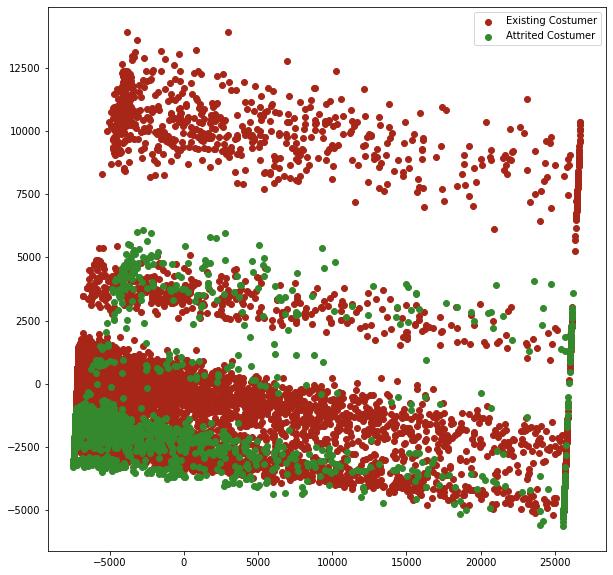

In [11]:
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

cmap_bold = ['#a72618', '#34892d']

from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.scatter(X_2D[y==0]["dimension 1"], X_2D[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D[y==1]["dimension 1"], X_2D[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

In [12]:
#T-SNE, sin estandarizar
tsne = TSNE(n_components=2)
X_2D_t2 = tsne.fit_transform(a)
X_2D_t2 = pd.DataFrame(X_2D_t2, columns=["dimension 1", "dimension 2"])
X_2D_t2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,dimension 1,dimension 2
0,-41.050453,-45.037476
1,-11.540120,-30.812531
2,19.261881,-36.541965
3,26.234695,-1.984879
4,10.535233,-39.721462
...,...,...
10122,83.508804,10.525528
10123,16.260729,-82.065331
10124,20.190836,-73.194954
10125,22.435875,-72.774033


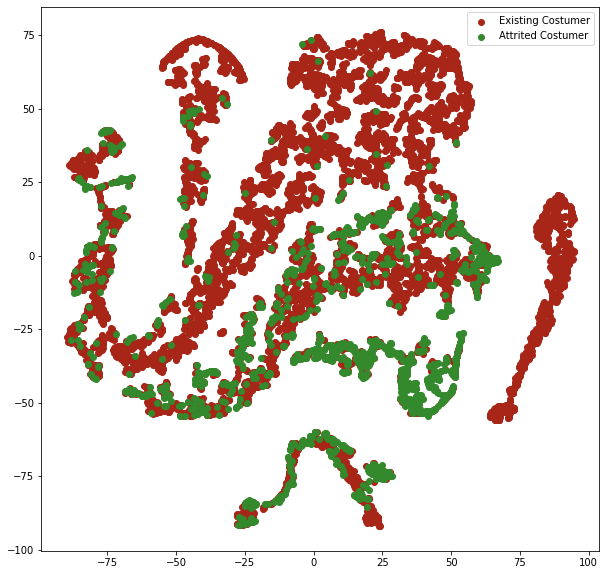

In [13]:
figure(figsize=(10, 10))

plt.scatter(X_2D_t2[y==0]["dimension 1"], X_2D_t2[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D_t2[y==1]["dimension 1"], X_2D_t2[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

Ahora veamos que pasa si estadarizamos el dataset.

In [14]:
std_scaler3 = StandardScaler()
a_std = std_scaler3.fit_transform(a)

In [15]:
#T-SNE, con estandarizar
tsne2 = TSNE(n_components=2)
X_2D_t = tsne2.fit_transform(a_std)
X_2D_t = pd.DataFrame(X_2D_t, columns=["dimension 1", "dimension 2"])
X_2D_t

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,dimension 1,dimension 2
0,35.558910,-2.371680
1,39.883793,-3.291380
2,-28.809317,-67.661369
3,-5.300255,-26.663820
4,-46.900089,-58.731606
...,...,...
10122,5.251327,95.265396
10123,-38.822269,23.564243
10124,-0.882291,-41.705170
10125,-48.700409,-35.307953


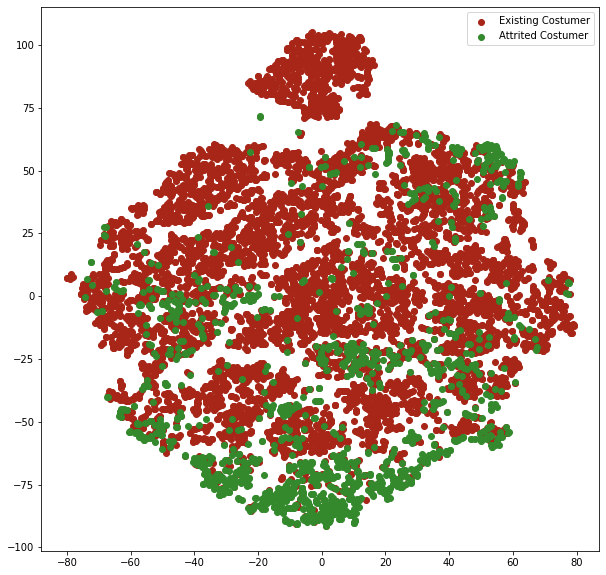

In [16]:
figure(figsize=(10, 10))

plt.scatter(X_2D_t[y==0]["dimension 1"], X_2D_t[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D_t[y==1]["dimension 1"], X_2D_t[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

In [17]:
#Reducción con PCA, con estandarizar
pca = PCA(n_components=2)
X_2D = pca.fit_transform(a_std)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])

X_2D

,dimension 1,dimension 2
0,-1.244228,-0.609947
1,-1.838574,-0.342820
2,-1.777564,-0.534406
3,-1.211747,-1.221645
4,-1.126856,-2.731900
...,...,...
10122,3.147746,2.003982
10123,1.353505,-0.937834
10124,0.411430,0.155446
10125,0.886168,-1.071771


In [18]:
#Vemos la varianza acumulada:
pca.explained_variance_ratio_

array([0.23036024, 0.19903654])

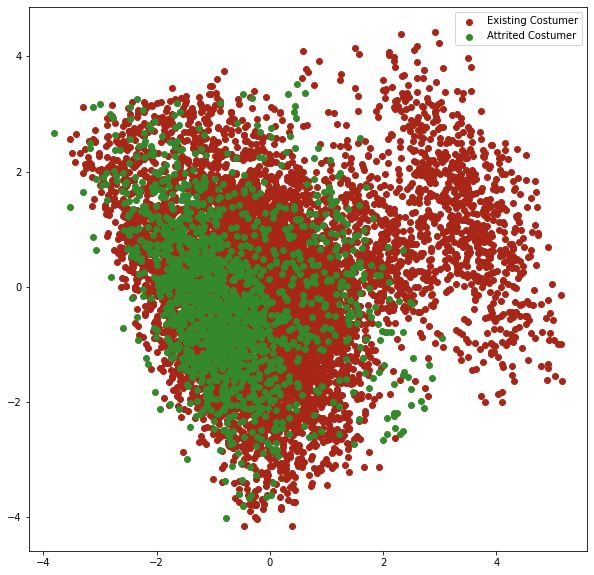

In [19]:
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

cmap_bold = ['#a72618', '#34892d']

from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.scatter(X_2D[y==0]["dimension 1"], X_2D[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D[y==1]["dimension 1"], X_2D[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

Ahora veamos como se ve con solo las variables que escogimos.

In [20]:
#Reducción con PCA, sin estandarizado
pca = PCA(n_components=2)
X_2D = pca.fit_transform(bank_data.drop("Attrition_Flag", axis = 1))
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])

X_2D

,dimension 1,dimension 2
0,3805.080879,-3557.137617
1,-606.500238,-3080.888946
2,-5390.523436,-2141.109064
3,-5538.223960,-2810.213718
4,-4175.351018,-3305.113509
...,...,...
10122,-3794.094424,11393.362180
10123,-4016.254107,4685.001938
10124,-2783.046856,6091.544626
10125,-3051.008698,4210.478194


In [21]:
#Vemos la varianza acumulada:
pca.explained_variance_ratio_

array([0.8754306 , 0.11759884])

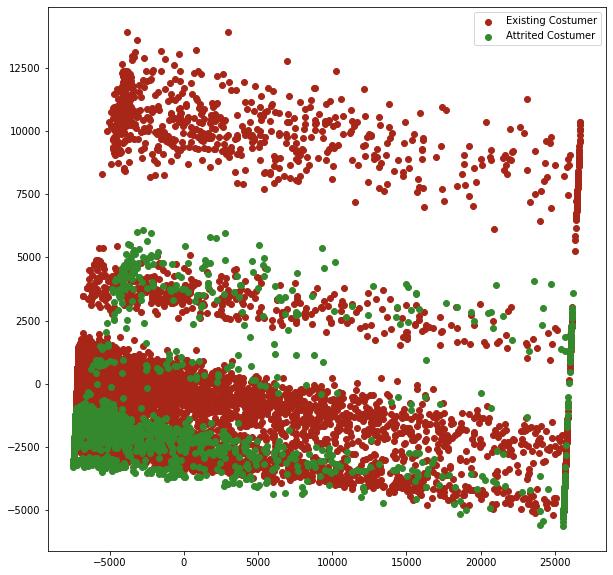

In [22]:
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

cmap_bold = ['#a72618', '#34892d', '#262ea7']

from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.scatter(X_2D[y==0]["dimension 1"], X_2D[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D[y==1]["dimension 1"], X_2D[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

In [23]:
#Reducción con PCA, estandarizado
pca = PCA(n_components=2)
X_2D = pca.fit_transform(bank_data_std)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])

X_2D

,dimension 1,dimension 2
0,-1.416743,-0.755078
1,-1.983759,-0.548853
2,-1.857896,-0.483695
3,-1.671852,0.582319
4,-1.967503,-1.766852
...,...,...
10122,3.669313,0.015101
10123,1.005181,-1.434396
10124,0.497896,0.803602
10125,0.426158,0.936495


In [24]:
#Vemos la varianza acumulada:
pca.explained_variance_ratio_

array([0.29026621, 0.15482446])

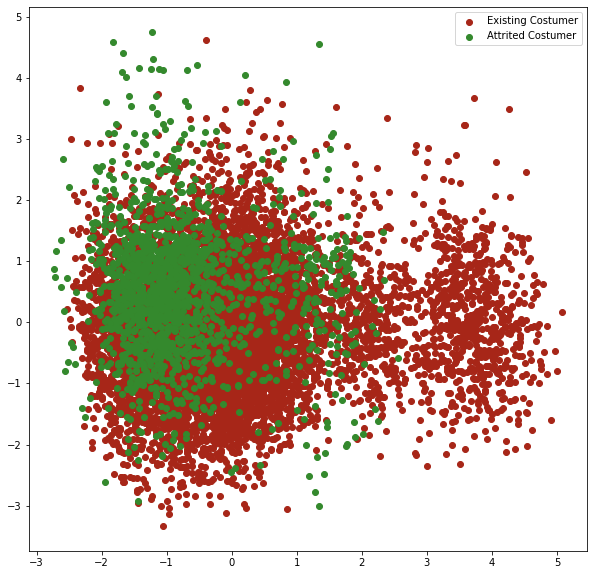

In [25]:
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

cmap_bold = ['#a72618', '#34892d', '#262ea7']

from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.scatter(X_2D[y==0]["dimension 1"], X_2D[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D[y==1]["dimension 1"], X_2D[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

In [26]:
#T-SNE, sin estandarizar
tsne = TSNE(n_components=2)
X_2D_t2 = tsne.fit_transform((bank_data_ordtrans.drop("Attrited Customer", axis = 1).drop("Existing Customer", axis = 1)))
X_2D_t2 = pd.DataFrame(X_2D_t2, columns=["dimension 1", "dimension 2"])
X_2D_t2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,dimension 1,dimension 2
0,-38.706516,46.364635
1,-57.591206,-2.289749
2,31.691345,-36.582016
3,-21.452042,-68.056168
4,-23.294262,-26.745003
...,...,...
10122,-75.115898,-30.671562
10123,74.103157,43.404812
10124,65.919327,40.406052
10125,65.331497,38.164249


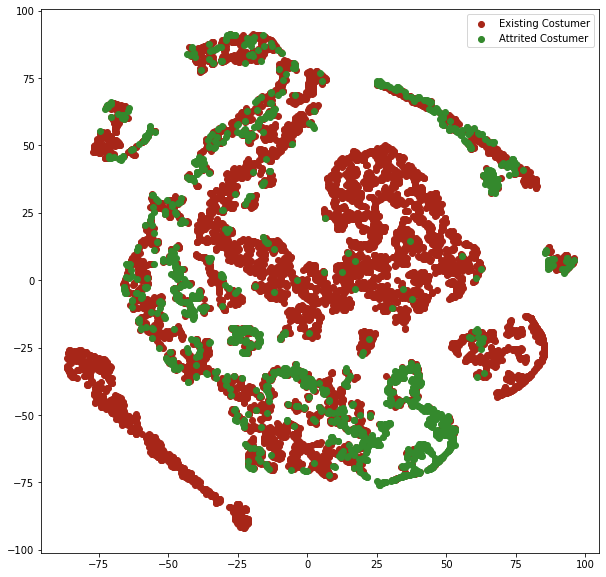

In [27]:
figure(figsize=(10, 10))

plt.scatter(X_2D_t2[y==0]["dimension 1"], X_2D_t2[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D_t2[y==1]["dimension 1"], X_2D_t2[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

In [28]:
#T-SNE, con estandarizar
tsne2 = TSNE(n_components=2)
X_2D_t = tsne2.fit_transform(bank_data_std)
X_2D_t = pd.DataFrame(X_2D_t, columns=["dimension 1", "dimension 2"])
X_2D_t

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,dimension 1,dimension 2
0,-39.307598,35.876255
1,-40.595608,32.810894
2,-49.509968,29.774401
3,5.103292,-37.371380
4,-57.234554,29.885326
...,...,...
10122,89.932098,6.767133
10123,17.827978,38.382439
10124,-35.209099,-18.460407
10125,-36.663830,-17.759056


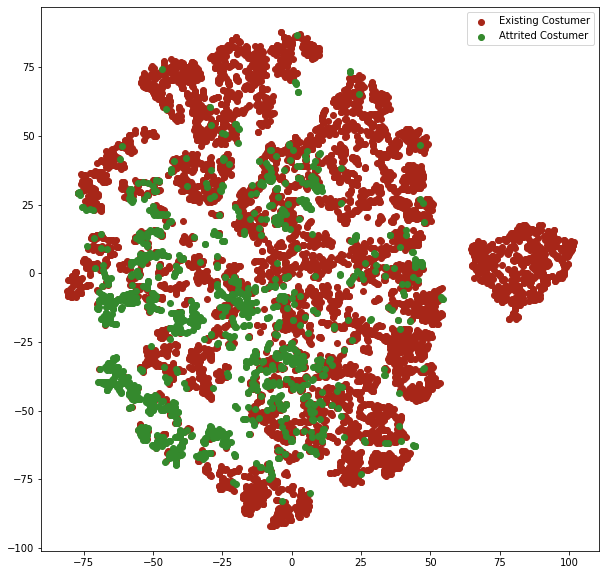

In [29]:
figure(figsize=(10, 10))

plt.scatter(X_2D_t[y==0]["dimension 1"], X_2D_t[y==0]["dimension 2"], c=cmap_bold[0], label='Existing Costumer')
plt.scatter(X_2D_t[y==1]["dimension 1"], X_2D_t[y==1]["dimension 2"], c=cmap_bold[1], label='Attrited Costumer')


plt.legend()
plt.show()

## Parte d) Entrenando un modelo. 

In [44]:
#Primero veamos el modelo con el dataset sin procesamiento pero con las variables que interesan
from sklearn.model_selection import train_test_split

X = bank_data.drop("Attrition_Flag", axis = 1)
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

rndm_frst = RandomForestClassifier(n_estimators=100, max_depth=10)
rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

from sklearn.metrics import classification_report

v1 = classification_report(y_test, y_pred)
p1 = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Ahora veamos como mejorar esto, primero veremos las mejores relaciones por variable.

In [45]:
feature_imp = pd.Series(
    rndm_frst.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

feature_imp

Total_Trans_Amt             0.288924
Total_Trans_Ct              0.264488
Total_Revolving_Bal         0.195927
Total_Relationship_Count    0.096660
Credit_Limit                0.069030
Months_on_book              0.046572
Months_Inactive_12_mon      0.038399
dtype: float64

Por tema de valores, solo dejaremos las 3 primeras variables, ahora hagamos lo mismo que lo anterior.

In [46]:
X2 = X
lista = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Months_on_book']
for i in lista:
  X2 = X2.drop(i, axis = 1)

In [47]:
from sklearn.model_selection import train_test_split

X = X2
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

rndm_frst = RandomForestClassifier(n_estimators=100, max_depth=10)
rndm_frst.fit(X_train2, y_train2)

y_pred2 = rndm_frst.predict(X_test2)

from sklearn.metrics import classification_report

v2 = classification_report(y_test2, y_pred2)
p2 = accuracy_score(y_test2, y_pred2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Ahora veamos con que parametros RandomForest da mejor resultado.

In [48]:
from sklearn.model_selection import GridSearchCV

# Como no es claro que eliminar columnas sea un pro, las dejaremos
# Usaremos X_train e y_train

maxd = []
for i in range(1,21, 2):
  maxd.append(i)

nestim = []
for i in range(100,1001, 150):
  nestim.append(i)

# Creamos una grilla de parámetros para buscar
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [100,200,300,500,1000]
}

# Instanciamos un modelo nuevo
rndm_frst = RandomForestClassifier()

# Instanciamos el modelo de búsqueda
grid_search = GridSearchCV(
    estimator=rndm_frst, 
    param_grid=param_grid, 
    cv = 3, n_jobs=-1, verbose=2
)

Primero con el primer dataset con las variables de interes.

In [49]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 15, 'n_estimators': 300}

In [50]:
#Primero veamos el modelo con el dataset sin procesamiento pero con las variables que interesan, ahora con cambio de parametros.
from sklearn.model_selection import train_test_split

X = bank_data.drop("Attrition_Flag", axis = 1)
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

rndm_frst = RandomForestClassifier(n_estimators=300, max_depth=15)
rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

from sklearn.metrics import classification_report

v3 = classification_report(y_test, y_pred)
p3 = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Luego con el segundo dataset con menos variables.

In [57]:
grid_search.fit(X_train2, y_train2)
grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 10, 'n_estimators': 200}

In [58]:
from sklearn.model_selection import train_test_split


X = X2
y = bank_data_ordtrans[['Attrited Customer']]
y = (y.to_numpy())

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

rndm_frst = RandomForestClassifier(n_estimators=200, max_depth=10)
rndm_frst.fit(X_train2, y_train2)

y_pred2 = rndm_frst.predict(X_test2)

from sklearn.metrics import classification_report

v4 = classification_report(y_test2, y_pred2)
p4 = accuracy_score(y_test2, y_pred2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


## Parte e) Validando los resultados. 

In [59]:
print(v1)
print(p1)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2543
           1       0.91      0.79      0.85       496

    accuracy                           0.95      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.95      0.95      3039

0.9529450477130635


In [60]:
print(v2)
print(p2)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2552
           1       0.81      0.67      0.74       487

    accuracy                           0.92      3039
   macro avg       0.88      0.82      0.85      3039
weighted avg       0.92      0.92      0.92      3039

0.922671931556433


In [61]:
print(v3)
print(p3)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2533
           1       0.89      0.79      0.84       506

    accuracy                           0.95      3039
   macro avg       0.92      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039

0.9486673247778875


In [62]:
print(v4)
print(p4)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2575
           1       0.79      0.70      0.75       464

    accuracy                           0.93      3039
   macro avg       0.87      0.83      0.85      3039
weighted avg       0.92      0.93      0.92      3039

0.926620598881211


## Parte f) Explicando los resultados. 